In [26]:
# Import Relevant Libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [27]:
# Import train and test dataset
train_raw = pd.read_csv("data_file/train.csv")
test_raw = pd.read_csv("data_file/test.csv")

In [28]:
# sumamry of train dataset
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1337 non-null   object 
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          878 non-null    object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
# column names that are not full
col_name = []
count_nul = []
for i in train_raw:
    count = train_raw[i].isnull().sum()
    if (count != 0):
        col_name.append(i)
        count_nul.append(count)
        
col_count = dict(zip(col_name, count_nul))

print("Following columns have null values")
col_count

Following columns have null values


{'LotFrontage': 123,
 'Alley': 582,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 6,
 'BsmtFinType1': 5,
 'BsmtFinType2': 6,
 'FireplaceQu': 200,
 'GarageType': 6,
 'GarageYrBlt': 6,
 'GarageFinish': 6,
 'GarageQual': 6,
 'GarageCond': 6,
 'PoolQC': 593,
 'Fence': 503,
 'MiscFeature': 582}

<Axes: >

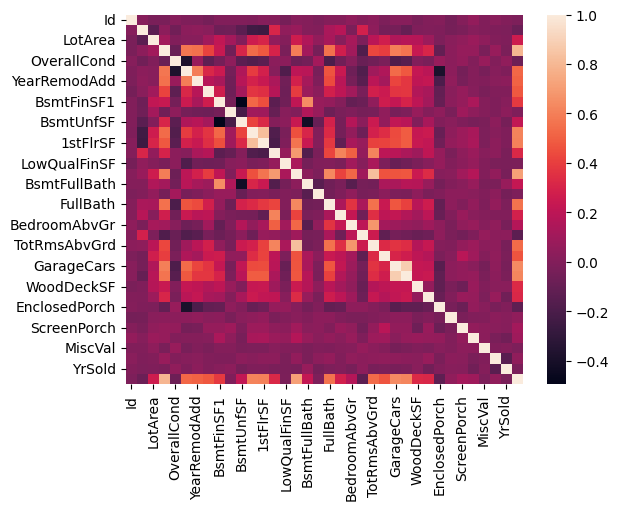

In [30]:
sns.heatmap(train_raw.corr(numeric_only = True))

In [33]:
# finding the correlation of each matrix, then identify correaltion compared to 'SalePrice'
cor = train_raw.corr(numeric_only = True)
SalePrice_cor = cor['SalePrice']

# print(SalePrice_cor)

index = []
correlation = []
for i in range(len(SalePrice_cor)):
    if SalePrice_cor[i] > 0.6 or SalePrice_cor[i] < -0.6:
        index.append(i)
        correlation.append(SalePrice_cor[i])
        
corr_dict = dict(zip(index, correlation))
corr_dict

# OverallQual      0.790982
# TotalBsmtSF      0.613581
# 1stFlrSF         0.605852
# GrLivArea        0.708624
# GarageCars       0.640409
# GarageArea       0.623431

{3: 0.7909816005838053,
 11: 0.6135805515591943,
 12: 0.6058521846919153,
 15: 0.7086244776126515,
 24: 0.6404091972583519,
 25: 0.6234314389183622,
 35: 1.0}

In [38]:
train_dataset = train_raw.loc[:,['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']]
train_dataset

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
...,...,...,...,...,...,...
1455,6,953,953,1647,2,460
1456,6,1542,2073,2073,2,500
1457,7,1152,1188,2340,1,252
1458,5,1078,1078,1078,1,240
